# Stroke prediciton - Exploratory Data Analysis

Stroke is ranked as the second leading cause of death and remains a huge public health burden despite the advancement in understanding of the disease. 

This project focuses on analyzing a stroke dataset to uncover patterns and insights that can help in predicting stroke risk. The steps include:
- Exploratory Data Analysis (EDA) to uncover key patterns.
- Preprocessing and feature engineering to prepare data for modeling.
- Highlighting relationships between features and the target variable (`stroke`).

### Importing necessary modules

In [405]:
# importing modules necessary for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the Data


In [406]:

stroke_df = pd.read_csv('data/stroke_data.csv')

### Data summary

A concise summary of data to gain better understanding of a dataset

In [407]:
print("Dataset info:")
stroke_df.info()

print("\nMissing Values:")
stroke_df.isnull().sum()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing Values:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Missing Data Analysis
Missing data can introduce bias if not handled properly. Below, we visualize the missing data for each feature to identify key columns requiring imputation.


np.float64(3.93)

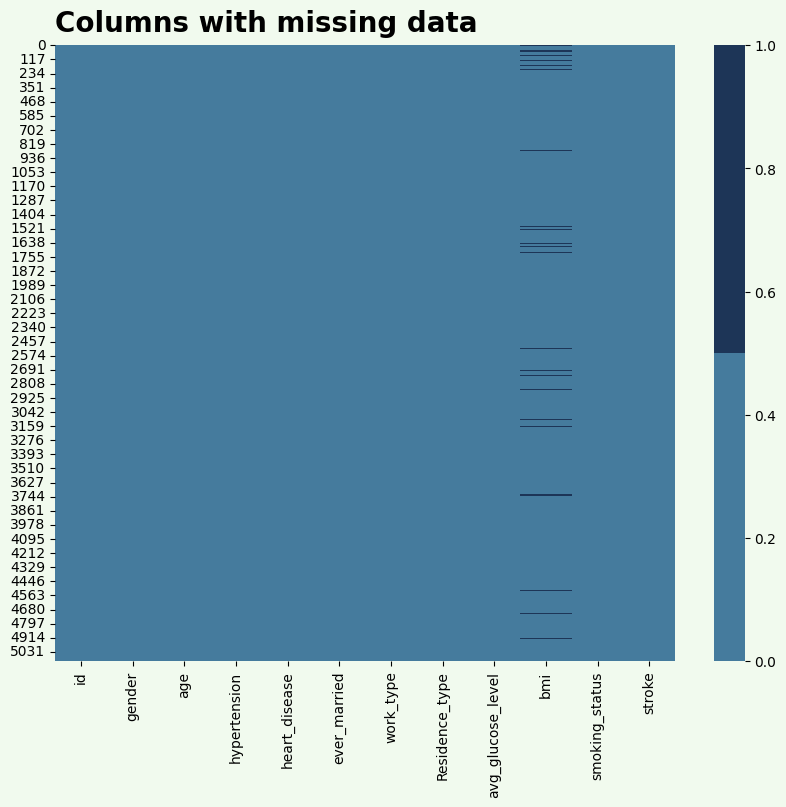

In [408]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Add heatmap with custom colors
colours = ['#457B9D', '#1D3557']
ax = sns.heatmap(stroke_df.isnull(), cmap=sns.color_palette(colours))

# Title
ax.set_title('Columns with missing data', fontsize=20, fontweight='bold', color='black', pad=10, loc='left')

# Background color
fig.patch.set_facecolor('#F1FAEE')
ax.set_facecolor('#F1FAEE')

# Calculate the percent of records with missing bmi value
missing_percentage = stroke_df['bmi'].isnull().mean() * 100
round(missing_percentage, 2)


### Target variable analysis

Analyzing the distribution of the target variable (`stroke`) to check for class imbalance. A significant imbalance can affect model training and may require special handling.

In [409]:
# Check values distribution in 'stroke' column
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

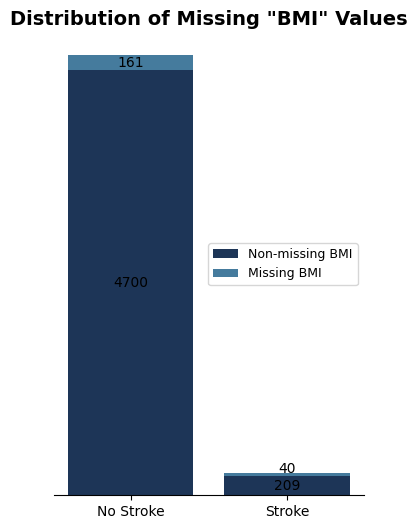

In [410]:
# Calculate missing and non-missing BMI counts for each group
missing_bmis = stroke_df[stroke_df['bmi'].isnull()]['stroke'].value_counts()
non_missing_bmis = stroke_df[stroke_df['bmi'].notnull()]['stroke'].value_counts()

# Prepare data
categories = ['No Stroke', 'Stroke']
missing_values = [missing_bmis.get(0, 0), missing_bmis.get(1, 0)]
non_missing_values = [non_missing_bmis.get(0, 0), non_missing_bmis.get(1, 0)]

# Create the plot
fig, ax = plt.subplots(figsize=(4, 6))

# Plot the stacked bars
ax.bar(categories, non_missing_values, color='#1D3557', label='Non-missing BMI')
ax.bar(categories, missing_values, bottom=non_missing_values, color='#457B9D', label='Missing BMI')

# Add labels
ax.text(0, non_missing_values[0] / 2, str(non_missing_values[0]), ha='center', va='center', color='black', fontsize=10)
ax.text(0, non_missing_values[0] + missing_values[0] / 2, str(missing_values[0]), ha='center', va='center', color='black', fontsize=10)

ax.text(1, non_missing_values[1] / 2, str(non_missing_values[1]), ha='center', va='center', color='black', fontsize=10)
ax.text(1, non_missing_values[1] + missing_values[1], str(missing_values[1]), ha='center', va='baseline', color='black', fontsize=10)

# Add title and legend
ax.set_title('Distribution of Missing "BMI" Values', fontsize=14, weight='bold')
ax.legend(loc='right', fontsize=9)

# Add x-axis labels and remove extras
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()


Dropping patients with missing BMI records could significantly affect the minority class (stroke = 1). This will exacerbate the imbalance even more. Although 'bmi' is missing, other features might still provide valuable information for analysis. 


### Pairplot of Key Features
This pairplot visualizes the relationships between `age`, `bmi`, and `avg_glucose_level`, colored by stroke risk. It helps identify trends and feature importance for stroke prediction.


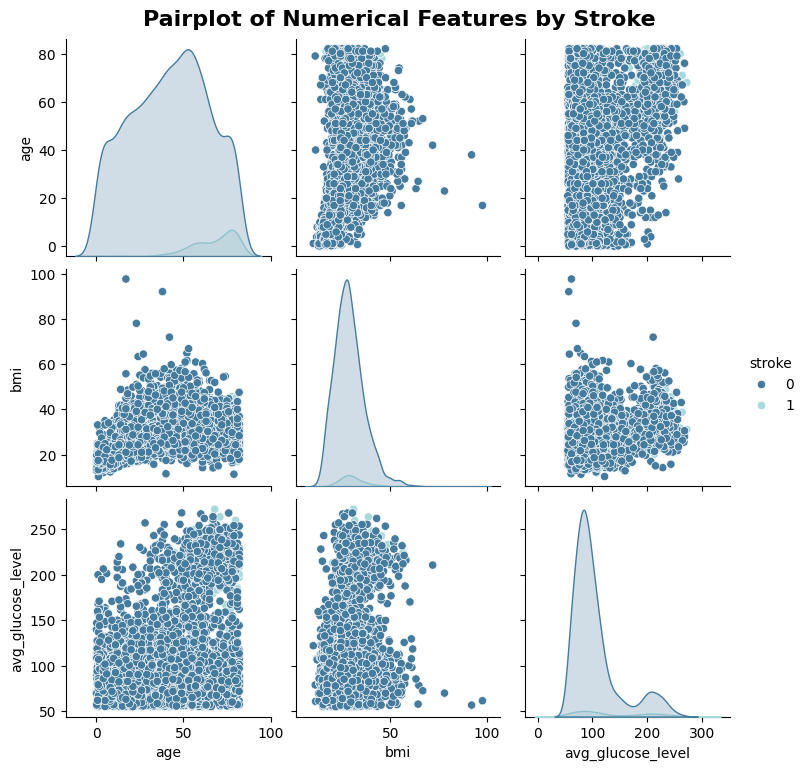

In [411]:
# Create a pairplot
sns.pairplot(
    stroke_df,
    vars=['age', 'bmi', 'avg_glucose_level'],  # Select numerical variables
    hue='stroke',  # Color by stroke (target variable)
    palette=['#457B9D', '#A8DADC'],  # Light blue and teal green
    diag_kind='kde'  # Use KDE for diagonal (distribution)
)

# Add title
plt.suptitle('Pairplot of Numerical Features by Stroke', fontsize=16, y=1.02, fontweight='bold')
plt.show()


### Feature Engineering
To improve analysis and model performance, we create the following features:
- **Age Groups**: Categorizing `age` into meaningful groups (e.g., Child, Young Adult) to analyze age-related trends.
- **BMI Categories**: Converting `bmi` into categories (e.g., Underweight, Normal) for better interpretability.


In [412]:
# Create Age Groups
bins = [0, 18, 35, 50, 65, 80, np.inf]
labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior', 'Elderly']
stroke_df['age_group'] = pd.cut(stroke_df['age'], bins=bins, labels=labels)

In [413]:
# Categorize BMI
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
stroke_df['bmi_category'] = pd.cut(stroke_df['bmi'], bins=bmi_bins, labels=bmi_labels)

### Correlation Heatmap

The correlation heatmap provides insights into the relationships between numerical variables in the dataset.

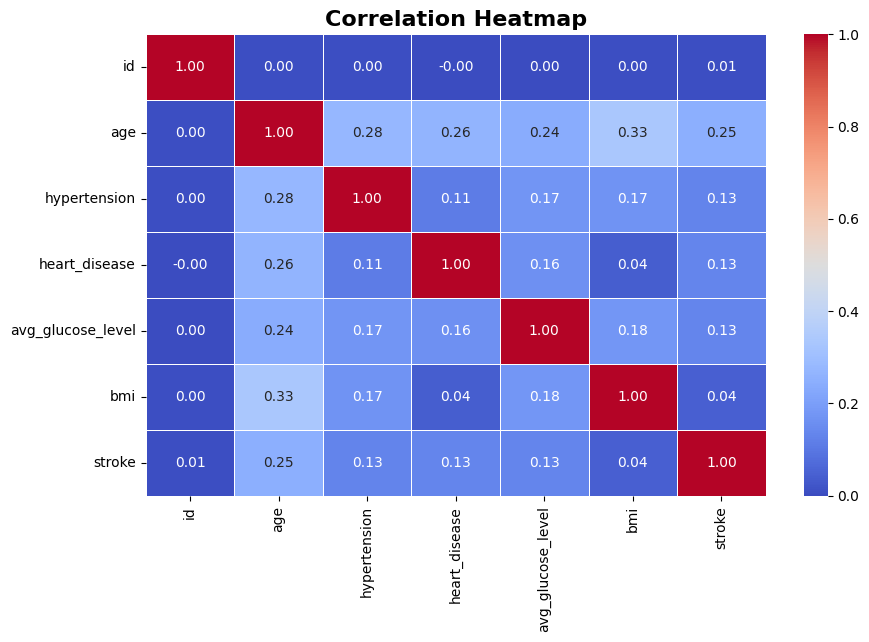

In [414]:
# Select numerical columns
numeric_columns = stroke_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()


Most values in the heatmap are close to zero, indicating weak linear relationships between numerical features. This suggests that the numerical features in the dataset may not be strongly related to one another or to the target variable (`stroke`).



# Summarizizng EDA insights

1. The dataset is highly imbalanced, with a majority of samples being `No Stroke`.
2. Missing data is present in the `bmi` column, which requires imputation.
3. Age and average glucose level show some correlation with stroke risk, as seen in the pairplot.
4. Feature engineering was performed to create 'age_group' and 'bmi_category' for categorical analysis.
"""
